<a href="https://colab.research.google.com/github/dinukaattanayaka/ML-SVM-image-classification-American-president-/blob/main/ML_SVM_image_classification(American_president).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import cv2
import numpy as np

In [ ]:

# Paths
data_path = '/content/drive/MyDrive/machine learning/DAY 2/train_data_2'

# Get labels and categories
labels = os.listdir(data_path)
categories = np.arange(len(labels))
category_dict = dict(zip(labels, categories))

print("Labels:", labels)
print("Categories:", categories)
print("Category Dictionary:", category_dict)

# Initialize face classifier
face_classifier = cv2.CascadeClassifier('/content/drive/MyDrive/machine learning/DAY 2/haarcascade_frontalface_default.xml')

# Loop through each label
face_count = 0
for label in labels:
    imgs_path = os.path.join(data_path, label)
    img_names = os.listdir(imgs_path)

    # Loop through each image
    for img_name in img_names:
        img_path = os.path.join(imgs_path, img_name)
        img = cv2.imread(img_path)

        if img is None:
            print(f"Failed to load image: {img_path}")
            continue

        # Convert to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_classifier.detectMultiScale(gray)

        # Process detected faces
        for (x, y, w, h) in faces:
            cropped_face = gray[y:y+h, x:x+w]
            resized_face = cv2.resize(cropped_face, (50, 50))


            # Save based on label
            if label == 'Barack Obama':
                output_path = '/content/drive/MyDrive/machine learning/DAY 2/resized_faces/barack_obama'
            elif label == 'Donald Trump':
                output_path = '/content/drive/MyDrive/machine learning/DAY 2/resized_faces/donald_trump'
            elif label == 'George W Bush':
                output_path = '/content/drive/MyDrive/machine learning/DAY 2/resized_faces/george_w_bush'
            else:
                print(f"Unknown label: {label}, skipping...")
                continue

            # Create directory if it doesn't exist
            os.makedirs(output_path, exist_ok=True)

            # Save face to output folder
            face_file = os.path.join(output_path, f"face_{face_count}.jpg")
            cv2.imwrite(face_file, resized_face)
            print(f"Saved: {face_file}")

            face_count += 1

print(f"Total faces saved: {face_count}")


Labels: ['Barack Obama', 'Donald Trump', 'George W Bush']
Categories: [0 1 2]
Category Dictionary: {'Barack Obama': 0, 'Donald Trump': 1, 'George W Bush': 2}
Saved: /content/drive/MyDrive/machine learning/DAY 2/resized_faces/barack_obama/face_0.jpg
Saved: /content/drive/MyDrive/machine learning/DAY 2/resized_faces/barack_obama/face_1.jpg
Saved: /content/drive/MyDrive/machine learning/DAY 2/resized_faces/barack_obama/face_2.jpg
Saved: /content/drive/MyDrive/machine learning/DAY 2/resized_faces/barack_obama/face_3.jpg
Saved: /content/drive/MyDrive/machine learning/DAY 2/resized_faces/barack_obama/face_4.jpg
Saved: /content/drive/MyDrive/machine learning/DAY 2/resized_faces/barack_obama/face_5.jpg
Saved: /content/drive/MyDrive/machine learning/DAY 2/resized_faces/barack_obama/face_6.jpg
Saved: /content/drive/MyDrive/machine learning/DAY 2/resized_faces/barack_obama/face_7.jpg
Saved: /content/drive/MyDrive/machine learning/DAY 2/resized_faces/barack_obama/face_8.jpg
Saved: /content/drive/M

In [ ]:
clean_data_path = '/content/drive/MyDrive/machine learning/DAY 2/resized_faces manual clean'

# Get labels and categories
labels = os.listdir(clean_data_path)
categories = np.arange(len(labels))
category_dict = dict(zip(labels, categories))

print("Labels:", labels)
print("Categories:", categories)
print("Category Dictionary:", category_dict)

Labels: ['barack_obama', 'donald_trump', 'george_w_bush']
Categories: [0 1 2]
Category Dictionary: {'barack_obama': 0, 'donald_trump': 1, 'george_w_bush': 2}


In [ ]:
data=[]      #create empty list
target=[]

for label in labels:
    imgs_path = os.path.join(data_path, label)
    img_names = os.listdir(imgs_path)

    # Loop through each image
    for img_name in img_names:
        img_path = os.path.join(imgs_path, img_name)
        img = cv2.imread(img_path)
        gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        print(gray_image.shape)


        data.append(gray_image)          #image add to the empty list
        target.append(category_dict[label])   #dict label value add to the list

(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)


In [ ]:
data=np.array(data)
data=data.reshape(data.shape[0],data.shape[1]*data.shape[2])
target=np.array(target)

np.save('/content/drive/MyDrive/machine learning/DAY 2/manual_clean_data',data) #manual_clean_data kyl numpy array ekakt save wenw dipu path eke
np.save('/content/drive/MyDrive/machine learning/DAY 2/manual_clean_target',target)

In [ ]:
np.array(data).shape

(25, 2500)

In [ ]:
print(data.shape)
print(target.shape)

(25, 2500)
(25,)


Train the model

In [3]:
import numpy as np

data=np.load('/content/drive/MyDrive/machine learning/DAY 2/data.npy')     #hadagnipu numpy array ekak use krnw
target=np.load('/content/drive/MyDrive/machine learning/DAY 2/target.npy')

In [4]:
from sklearn.svm import SVC #importing the SVM
from sklearn.decomposition import PCA #importing PCA
from sklearn.pipeline import make_pipeline

pca=PCA(n_components=150,whiten=True,random_state=42)
svc=SVC(kernel='rbf')

model=make_pipeline(pca,svc) #order eka wadagth pca apply wela thmi svc apply wenne

In [5]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [6]:
model.fit(train_data,train_target)

Pipeline(steps=[('pca', PCA(n_components=150, random_state=42, whiten=True)),
                ('svc', SVC())])

In [7]:
predicted_target=model.predict(test_data)

In [8]:
from sklearn.metrics import accuracy_score

acc=accuracy_score(test_target,predicted_target)
print(acc) #meeta amatharawa precision    recall  f1-score blnna puluwn

0.896551724137931


In [9]:
from sklearn.metrics import classification_report  #classification report eka gnnw

print(classification_report(test_target,predicted_target,target_names=['Barack Obama', 'Donald Trump', 'George W Bush']))
#support kyn test krn dana set eka athule obama keeyk thibund wge

               precision    recall  f1-score   support

 Barack Obama       0.89      0.89      0.89         9
 Donald Trump       0.91      0.91      0.91        11
George W Bush       0.89      0.89      0.89         9

     accuracy                           0.90        29
    macro avg       0.90      0.90      0.90        29
 weighted avg       0.90      0.90      0.90        29



In [13]:
from sklearn.metrics import confusion_matrix

matrix=confusion_matrix(test_target,predicted_target)
print(matrix)

[[ 8  0  1]
 [ 1 10  0]
 [ 0  1  8]]


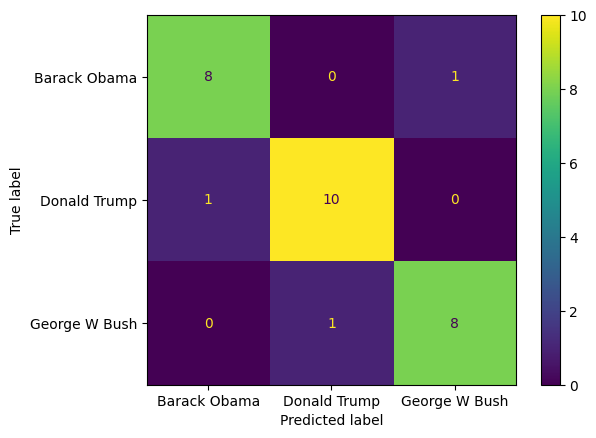

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay

# Creating the display
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=['Barack Obama', 'Donald Trump', 'George W Bush'])
disp.plot()


In [ ]:
import joblib

joblib.dump(model,'/content/drive/MyDrive/machine learning/DAY 2/ML SVM image classification(American president)(my).sav')

['/content/drive/MyDrive/machine learning/DAY 2/ML SVM image classification(American president)(my).sav']